# 探索数据集-未前往就诊的挂号预约

# 问题：有哪些重要因素能够帮助我们预测患者是否会按照其挂号预约前往医院就诊？

# 一、整理数据

## 整理数据中所做处理：
1、查看各表头命名规则  
&emsp;&emsp;有异常：将No-show改为No_show  
2、加列Show,1为赴约，0为未赴约  
3、查看数据类型  
&emsp;&emsp;有异常：ScheduledDay、AppointmentDay在表中类型为object类型，将其进行了数据转换为datetime类型  
4、检验各指标逻辑问题  
&emsp;&emsp;有异常：有5条记录ScheduledDay>AppointmentDay超过1天，将其进行了删除  
5、查看各指标唯一值  
&emsp;&emsp;有异常：Age在表中存在-1，为异常值，将其所在行进行删除  
6、每列非空值的数量  
&emsp;&emsp;正常：无空值  
7、各指标数据描述  
&emsp;&emsp;正常：无异常情况出现  
8、整体数据是否有重复值  
&emsp;&emsp;正常：无重复数据

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
filename='data/noshowappointments_kagglev2_may_2016.csv'
df = pd.read_csv(filename)
df.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [71]:
#df.index=df.index.astype(int)
#转换index为数字

### 1、将No-show改为No_show

In [72]:
df.rename(index=int, columns={'No-show': 'No_show'},inplace=True)

In [73]:
df.loc[0]

PatientId                  2.98725e+13
AppointmentID                  5642903
Gender                               F
ScheduledDay      2016-04-29T18:38:08Z
AppointmentDay    2016-04-29T00:00:00Z
Age                                 62
Neighbourhood          JARDIM DA PENHA
Scholarship                          0
Hipertension                         1
Diabetes                             0
Alcoholism                           0
Handcap                              0
SMS_received                         0
No_show                             No
Name: 0, dtype: object

In [74]:
df.loc[0,'No_show']

'No'

In [75]:
i=1
ii=str(i)
ii

'1'

### 2、加列Show,1为赴约，0为未赴约

In [76]:
# for i in df.shape[0]:   
#     if df.loc[i,'No_show']== 'No':
#         df.loc[i,'Show']=1
#     else:
#         df.loc[i,'Show']=0
#     i=i+1

In [77]:
df['Show']=df['No_show']

In [78]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,No


In [79]:
def f(x):
    if x== 'No':
        x=1
    else:
        x=0
    return x

In [80]:
df['Show']=df['Show'].apply(f)

In [81]:
df['Show']

0         1
1         1
2         1
3         1
4         1
5         1
6         0
7         0
8         1
9         1
10        1
11        0
12        1
13        1
14        1
15        1
16        1
17        0
18        1
19        1
20        0
21        0
22        0
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
110497    1
110498    1
110499    1
110500    1
110501    1
110502    1
110503    1
110504    1
110505    1
110506    1
110507    1
110508    1
110509    1
110510    1
110511    1
110512    1
110513    1
110514    1
110515    0
110516    0
110517    1
110518    1
110519    1
110520    1
110521    1
110522    1
110523    1
110524    1
110525    1
110526    1
Name: Show, Length: 110527, dtype: int64

In [82]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


In [83]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [84]:
# 返回数据框维度的元组(即行，列)
df.shape

(110527, 15)

### 3、查看数据类型
  有异常：ScheduledDay、AppointmentDay在表中类型为object类型，将其进行了数据转换为datetime类型

In [85]:
# 返回列的数据类型
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No_show            object
Show                int64
dtype: object

#### 数据中ScheduledDay，AppointmentDay现状为字符型，使用pandas的to_datetime函数转换为datetime型

In [86]:
#转换为datetime型
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [87]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
Show              110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 18.5+ MB


### 4、检验各指标逻辑问题
  有异常：有5条记录ScheduledDay>AppointmentDay超过1天，将其进行了删除

In [89]:
df['cha']=df['AppointmentDay']-df['ScheduledDay']

In [90]:
df['cha_days']=(df['cha'] / np.timedelta64(1, 'D')).astype(int)

In [91]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,cha,cha_days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067,9 days 17:08:34.161960,9.532648
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15 days 05:51:27.891504,15.027798
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7 days +10:10:40,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1 days +15:41:31.500000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3 days 11:22:18,3.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14 days 07:41:34.500000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178 days 13:19:01,178.000000


In [92]:
de_row_days_value=df.loc[df['cha_days'] < 0]
print(de_row_days_value.shape)
de_row_days=de_row_days_value.index.values[0:5]
print(de_row_days_value)
print(de_row_days)

(5, 17)
          PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
27033  7.839273e+12        5679978      M 2016-05-10 10:51:53     2016-05-09   
55226  7.896294e+12        5715660      F 2016-05-18 14:50:41     2016-05-17   
64175  2.425226e+13        5664962      F 2016-05-05 13:43:58     2016-05-04   
71533  9.982316e+14        5686628      F 2016-05-11 13:49:20     2016-05-05   
72362  3.787482e+12        5655637      M 2016-05-04 06:50:57     2016-05-03   

       Age  Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
27033   38    RESISTÊNCIA            0             0         0           0   
55226   19  SANTO ANTÔNIO            0             0         0           0   
64175   22     CONSOLAÇÃO            0             0         0           0   
71533   81  SANTO ANTÔNIO            0             0         0           0   
72362    7     TABUAZEIRO            0             0         0           0   

       Handcap  SMS_received No_show  Show

In [93]:
de_row_days

array([27033, 55226, 64175, 71533, 72362], dtype=int64)

In [94]:
df=df.drop(de_row_days[0:5])

In [95]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,cha,cha_days
count,1.105220e+05,1.105220e+05,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522,110522.000000
mean,1.474935e+14,5.675305e+06,37.089041,0.098270,0.197255,0.071868,0.030401,0.022231,0.321040,0.798104,9 days 17:09:21.907927,9.533170
std,2.560866e+14,7.129722e+04,23.110064,0.297681,0.397928,0.258270,0.171689,0.161493,0.466878,0.401417,15 days 05:51:38.019538,15.027932
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +03:15:06,0.000000
25%,4.172536e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1 days +15:41:34.250000,0.000000
50%,3.173700e+13,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3 days 11:23:40.500000,3.000000
75%,9.439277e+13,5.725525e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14 days 07:41:43.250000,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178 days 13:19:01,178.000000


### 5、查看各指标唯一值
  有异常：Age在表中存在-1，为异常值，将其所在行进行删除

In [96]:
#查看各指标唯一值的个数
for col in df.columns:
    print('{} : {}'.format(col, len(df[col].dropna().unique())))

PatientId : 62299
AppointmentID : 110522
Gender : 2
ScheduledDay : 103544
AppointmentDay : 27
Age : 104
Neighbourhood : 81
Scholarship : 2
Hipertension : 2
Diabetes : 2
Alcoholism : 2
Handcap : 5
SMS_received : 2
No_show : 2
Show : 2
cha : 89707
cha_days : 128


In [97]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Show,cha,cha_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,-1 days +05:21:52,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,-1 days +07:51:33,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,-1 days +07:40:56,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,-1 days +06:30:29,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,-1 days +07:52:37,0


In [98]:
#查看Age唯一值内容
print(df['Age'].unique())

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [99]:
#查看Handcap唯一值内容
print(df['Handcap'].unique())

[0 1 2 3 4]


In [100]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Show,cha,cha_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,-1 days +05:21:52,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,-1 days +07:51:33,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,-1 days +07:40:56,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,-1 days +06:30:29,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,-1 days +07:52:37,0


In [101]:
#age为-1为异常值，获取该行号和内容
de_row_value=df.loc[df['Age'] == -1]
de_row=de_row_value.index.values[0]
print(de_row_value)
print(de_row)

          PatientId  AppointmentID Gender        ScheduledDay AppointmentDay  \
99832  4.659432e+14        5775010      F 2016-06-06 08:58:13     2016-06-06   

       Age Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
99832   -1         ROMÃO            0             0         0           0   

       Handcap  SMS_received No_show  Show               cha  cha_days  
99832        0             0      No     1 -1 days +15:01:47         0  
99832


In [102]:
#删除age为-1的所在行
df=df.drop([de_row])

### 6、每列非空值的数量
  正常：无空值

In [103]:
# 包括每列非空值的数量
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 17 columns):
PatientId         110521 non-null float64
AppointmentID     110521 non-null int64
Gender            110521 non-null object
ScheduledDay      110521 non-null datetime64[ns]
AppointmentDay    110521 non-null datetime64[ns]
Age               110521 non-null int64
Neighbourhood     110521 non-null object
Scholarship       110521 non-null int64
Hipertension      110521 non-null int64
Diabetes          110521 non-null int64
Alcoholism        110521 non-null int64
Handcap           110521 non-null int64
SMS_received      110521 non-null int64
No_show           110521 non-null object
Show              110521 non-null int64
cha               110521 non-null timedelta64[ns]
cha_days          110521 non-null int32
dtypes: datetime64[ns](2), float64(1), int32(1), int64(9), object(3), timedelta64[ns](1)
memory usage: 14.8+ MB


In [104]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show', 'Show',
       'cha', 'cha_days'],
      dtype='object')

### 7、各指标数据描述
  正常：无异常情况出现

In [105]:
# 返回每列数据的有效描述性统计
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,cha,cha_days
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,0.798102,9 days 17:09:29.794708,9.533256
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,0.401419,15 days 05:51:41.368394,15.027972
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1 days +03:15:06,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1 days +15:41:35,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3 days 11:24:01,3.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14 days 07:41:44,14.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,178 days 13:19:01,178.000000


In [106]:
df.shape

(110521, 17)

### 8、整体数据是否有重复值
  正常：无重复数据

In [107]:
# 检查数据中的重复
sum(df.duplicated())

0

# 二、执行 EDA（探索性数据分析）

### 问题：有哪些重要因素能够帮助我们预测患者是否会按照其挂号预约前往医院就诊？

### 重要因素有  
1、Age：年龄与赴约率相关性较高，；2、Sms_received：Sms_received与赴约率相关性较高  
注：受数据影响，结论只是暂时的

整个数据探索流程的局限性:  
1、受数据集影响，指标有限，数据量有限，对现有特征进行探索  
2、去除了6条异常值，对数据无明显影响  
3、本项目只探索了特征之间的相互关系，并没有他们之间的因果关系

#### 操作一： 按是否赴约分组，查看各指标表现

In [108]:
df1=df.groupby(['Show']).mean()
df1

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,cha_days
Show,,,,,,,,,,
0,1.467385e+14,5.652252e+06,34.317872,0.115533,0.169042,0.064085,0.030340,0.020212,0.438469,14.915793
1,1.476809e+14,5.681135e+06,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,8.171619


In [109]:
df2=df1.drop(['PatientId','AppointmentID'], axis=1)
df2

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,cha_days
Show,,,,,,,,
0,34.317872,0.115533,0.169042,0.064085,0.030340,0.020212,0.438469,14.915793
1,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337,8.171619


In [110]:
df2.index.astype('int')

Int64Index([0, 1], dtype='int64', name='Show')

In [111]:
df3=df2.loc[0]-df2.loc[1]
df3

Age            -3.472632
Scholarship     0.021629
Hipertension   -0.035352
Diabetes       -0.009752
Alcoholism     -0.000077
Handcap        -0.002530
SMS_received    0.147132
cha_days        6.744174
dtype: float64

Text(0.5,1,"The mean of no_show's indices and show's indices")

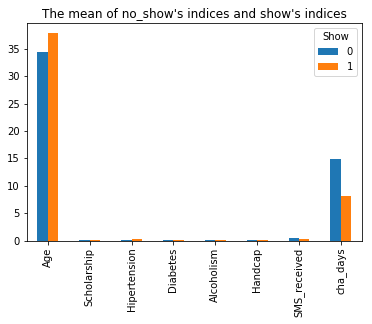

In [112]:
df2.T.plot(kind='bar')
plt.title('The mean of no_show\'s indices and show\'s indices')

#### 按是否按其挂号预约前往医院就诊分类对各项指标求均值可发现：
1、按其挂号预约赴约的人群与未按其挂号预约赴约的人群相比：  年龄均值大3.47岁左右，福利保障无（Scholarship为0）的占比多2.16%，Hipertension为1的占比多3.539%，Diabetes为1的占比多0.97%,酗酒的两者差距在0.01%左右，并不大，	Handcap为1的占比多2.445%，SMS收不到的占比多14.7%，赴约日期与预定日期平均间距（AppointmentDay-ScheduledDay）多6.7天。

In [113]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Show,cha,cha_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,-1 days +05:21:52,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,-1 days +07:51:33,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,-1 days +07:40:56,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,-1 days +06:30:29,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,-1 days +07:52:37,0


In [114]:
df4=df.groupby(['Show']).count()
df4

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,cha,cha_days
Show,,,,,,,,,,,,,,,,
0,22314,22314,22314,22314,22314,22314,22314,22314,22314,22314,22314,22314,22314,22314,22314,22314
1,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207,88207


In [115]:
df5=df4['PatientId']
df5

Show
0    22314
1    88207
Name: PatientId, dtype: int64

SMS_received
0    75039
1    35482
dtype: int64


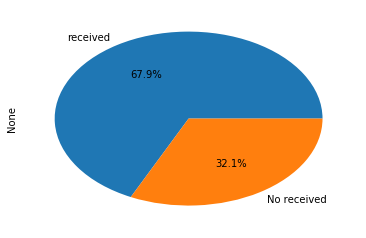

In [116]:
received_count = df.groupby('SMS_received').size()
print (received_count)
received_count.plot(kind='pie', labels=['received','No received'], autopct='%.1f%%');

#### 67.9%的人可以收到短信，32.1%的人收不到短信

In [117]:
df6=df.groupby(['SMS_received']).mean()
df6

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,Show,cha_days
SMS_received,,,,,,,,,,
0,1.492049e+14,5.687885e+06,36.888698,0.098029,0.198977,0.074455,0.033489,0.024907,0.833020,5.521875
1,1.438652e+14,5.648697e+06,37.513810,0.098782,0.193619,0.066400,0.023871,0.016572,0.724255,18.016713


In [118]:
df6.loc[:,'Show']#df6.loc[0,'Show']

SMS_received
0    0.833020
1    0.724255
Name: Show, dtype: float64

Text(0.5,1,'Rate of engagement between SMS_no_received and SMS_received')

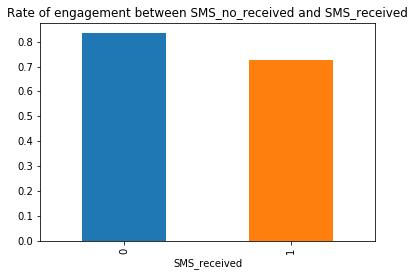

In [119]:
df6.loc[:,'Show'].plot(x="SMS_received",y="show",kind="bar");
plt.title('Rate of engagement between SMS_no_received and SMS_received')

#### 患者收到短信提醒的赴约比例低于于未收到短信提醒的赴约比例

In [120]:
df7=df[df.SMS_received==1]

In [121]:
#看收到信息后cha_days的情况
df7['cha_days'].unique()

array([  2,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,  23,  20,
        15,  21,  29,  30,  44,  45,  14,  42,  41,  38,  36,  31,  37,
        43,  49,  59,  52,  64,  66,  90,  65,  83,  77,  86, 114, 108,
        69,  71,  56,  62,  57,  50,  58,  40,  48,  72,  63,  55,  19,
        32,  33,   5,  34,  35,  11,  12,  39,  46,   4,  24,  25,   6,
         7,  47,  60,  54,  18,  26,  61, 175,  53,  76,  68,  82,  75,
        80,  78,  51,  67,  74, 111,  97,  93, 141, 154, 168, 103, 124,
        95,  87, 150, 126, 110, 118, 102, 101, 100, 121,  89,  91,  84,
        70,  85,  73,  88,  96, 104,  92,  94,  79, 138, 109, 131, 106,
       178, 116, 145, 122], dtype=int64)

In [122]:
df8=df[df.SMS_received==0]

In [123]:
#看没有收到信息后cha_days的情况
df8['cha_days'].unique()

array([  0,   1,  22,  10,   2,  14,  20,  42,  13,  27,  41,  23,  31,
        30,  55,  28,  17,  44,   3,  29,   8,  38,  16,   9,  21,  36,
        43,  37,  51,  62,  57,  15,  49,  45,  58,  48,  63,  33,  32,
        34,   5,  11,  40,   7,  35,   6,   4,  47,  39,  26,  19,  18,
        60,  46,  54,  52,  12,  61,  56,  24,  88,  66, 102,  80,  65,
        25,  59,  76,  72,  53,  67,  71,  64,  74,  68,  69,  50,  84,
        90,  78,  83,  79,  85,  82,  77, 161, 132, 168, 154,  89, 125,
        73,  70,  87,  81, 107, 111, 109, 110, 121, 104,  86,  95,  75,
        93,  96, 106,  92,  97, 101, 178, 175], dtype=int64)

赴约时间与预约时间差的值中，有收到信息的：大于等于2，没有收到信息的：大于等于0  
基于常理猜想：在赴约时间与预约时间差小于2时，短信提醒对其是否赴约无太大影响，同时为比较是否收到短信对赴约的影响，  
做如下比较： 比较赴约时间与预约时间差大于等于2时，患者的赴约率

In [124]:
df9=df[df.cha_days>=2]

In [133]:
df10=df9.groupby('SMS_received').mean()

Text(0.5,1,'Rate of engagement between SMS_no_received and SMS_received when cha_days >=2')

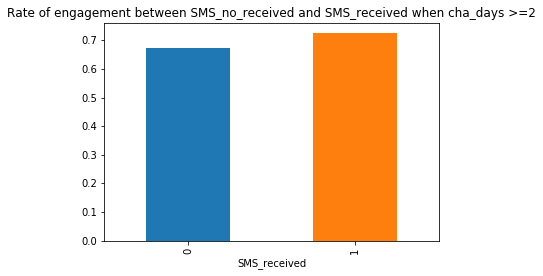

In [134]:
df10.loc[:,'Show'].plot(x="SMS_received",y="show",kind="bar");
plt.title('Rate of engagement between SMS_no_received and SMS_received when cha_days >=2')

#### 在赴约时间与预约时间差大于等于2时，患者收到短信提醒的赴约比例高于未收到短信提醒的赴约比例

Text(0.5,1,'Diabetes count')

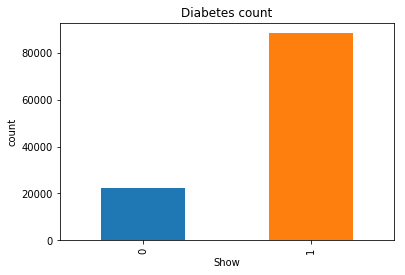

In [127]:
df5.plot('bar')
plt.ylabel("count") # 记得加y轴注解
plt.title("Diabetes count") # 记得加标

#### 未赴约的有22319次，赴约的人次有88207次

#### 操作二：由于还有性别（Gender），预约人的地址未能用mean表示，进行分别的分析

In [128]:
df2=df.groupby(['Gender']).mean()
df2

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,cha_days
Gender,,,,,,,,,,,
F,1.460009e+14,5.674335e+06,38.894468,0.123239,0.213528,0.078039,0.017025,0.019531,0.336906,0.796885,9.833231
M,1.502570e+14,5.677103e+06,33.737443,0.051906,0.167041,0.060411,0.055241,0.027246,0.291586,0.800362,8.976218


In [129]:
df2.loc['F']-df2.loc['M']

PatientId       -4.256161e+12
AppointmentID   -2.767165e+03
Age              5.157025e+00
Scholarship      7.133262e-02
Hipertension     4.648655e-02
Diabetes         1.762785e-02
Alcoholism      -3.821616e-02
Handcap         -7.715105e-03
SMS_received     4.532040e-02
Show            -3.477327e-03
cha_days         8.570131e-01
dtype: float64

#### 男性赴约成功的可能性较女性高0.347%，性别因素与患者是否会按照其挂号预约前往医院就诊的相关性较低

In [130]:
df2=df.groupby(['Neighbourhood']).mean()
df2

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,cha_days
Neighbourhood,,,,,,,,,,,
AEROPORTO,3.945965e+13,5.657990e+06,53.125000,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.875000,14.125000
ANDORINHAS,1.495863e+14,5.677587e+06,36.106101,0.142794,0.259063,0.132184,0.022989,0.040230,0.250663,0.769673,8.090186
ANTÔNIO HONÓRIO,1.361996e+14,5.668357e+06,36.845018,0.051661,0.018450,0.011070,0.000000,0.003690,0.343173,0.815498,12.992620
ARIOVALDO FAVALESSA,1.517085e+14,5.685724e+06,32.847518,0.184397,0.131206,0.067376,0.049645,0.039007,0.202128,0.780142,6.528369
BARRO VERMELHO,1.423487e+14,5.686655e+06,45.040189,0.000000,0.134752,0.054374,0.004728,0.014184,0.338061,0.784870,6.669031
BELA VISTA,1.525532e+14,5.688532e+06,34.969061,0.117986,0.277923,0.086523,0.049816,0.044048,0.302569,0.798637,6.167278
BENTO FERREIRA,1.320765e+14,5.681297e+06,44.613054,0.026807,0.231935,0.086247,0.009324,0.026807,0.376457,0.775058,9.019814
BOA VISTA,1.685577e+14,5.696338e+06,31.243590,0.073718,0.118590,0.048077,0.019231,0.000000,0.400641,0.814103,5.416667
BONFIM,1.409473e+14,5.683199e+06,35.179228,0.134511,0.258565,0.071403,0.059863,0.017310,0.280923,0.801659,7.232600


In [131]:
df.groupby(['Neighbourhood']).count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Show,cha,cha_days
Neighbourhood,,,,,,,,,,,,,,,,
AEROPORTO,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
ANDORINHAS,2262,2262,2262,2262,2262,2262,2262,2262,2262,2262,2262,2262,2262,2262,2262,2262
ANTÔNIO HONÓRIO,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271,271
ARIOVALDO FAVALESSA,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282
BARRO VERMELHO,423,423,423,423,423,423,423,423,423,423,423,423,423,423,423,423
BELA VISTA,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907,1907
BENTO FERREIRA,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858
BOA VISTA,312,312,312,312,312,312,312,312,312,312,312,312,312,312,312,312
BONFIM,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773,2773


In [132]:
df2['Show'].describe()

count    81.000000
mean      0.794592
std       0.097235
min       0.000000
25%       0.782546
50%       0.802412
75%       0.820093
max       1.000000
Name: Show, dtype: float64

不同地区的赴约成功率不同，从0-1皆有，整体分布在20%左右，但由于地区较多，数据量较少，不能充分说明地区对患者是否会按照其挂号预约前往医院就诊的影响，暂且不讨论该因素

### 综上所述：重要因素有 1、Age 2、Sms_received